In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from functools import reduce

In [ ]:
def exploit_results(prefix:str, nb_iteration:str) -> (pd.core.frame.DataFrame,int,int):
    """Read from CSV results files and return a concatenated dataframe, the failure and the exception counts."""
    df_exceptions = []
    df_failures = []
    df_stats_history = []
    df_stats = []

    for i in range(0, nb_iteration):
        iteration = f"{i+1:02d}"
        df_exceptions.append(pd.read_csv(f"../results/{prefix}_{iteration}_exceptions.csv"))
        df_failures.append(pd.read_csv(f"../results/{prefix}_{iteration}_failures.csv"))
        df_stats_history.append(pd.read_csv(f"../results/{prefix}_{iteration}_stats_history.csv"))
        df_stats.append(pd.read_csv(f"../results/{prefix}_{iteration}_stats.csv"))

    df = pd.concat(df_stats_history)
    failure_count = sum(df["Occurrences"].sum() for df in df_failures)
    exception_count = sum(df["Count"].sum() for df in df_exceptions)
    return (df, failure_count, exception_count)

In [3]:
# Retrieve results from CSVs 
(df1, failure1, exception1) = exploit_results("run_ralph_post", nb_iteration=3)
(df2, failure2, exception2) = exploit_results("run_learninglocker_post", nb_iteration=3)
(df3, failure3, exception3) = exploit_results("run_lrsql_post", nb_iteration=3)

In [10]:
print(f"Ralph had {failure1} failure(s) and {exception1} exception(s) on the 3 runs")
print(f"Learninglocker had {failure2} failure(s) and {exception2} exception(s) on the 3 runs")
print(f"lrsql had {failure3} failure(s) and {exception3} exception(s) on the 3 runs")


Ralph had 38677 failure(s) and 0 exception(s)
Learninglocker had 2693 failure(s) and 0 exception(s)
lrsql had 0 failure(s) and 0 exception(s)


In [ ]:
y = "Total Average Response Time"

In [ ]:
# Set style of seaborn
sns.set_style("darkgrid")

[Text(0, 0.5, 'Total Average Response Time (in ms)')]

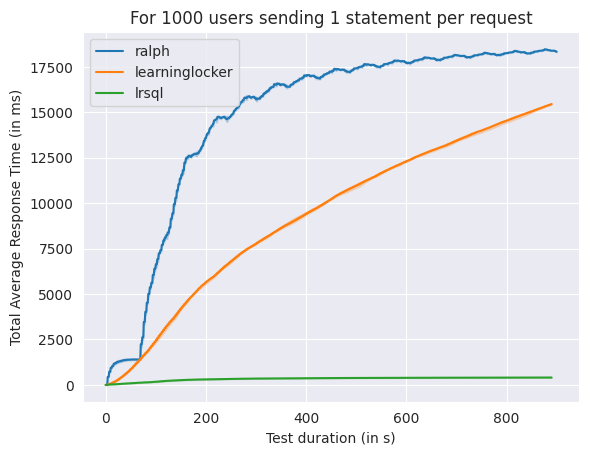

In [11]:
rel = sns.lineplot(x=df1.index, y=y, data=df1, legend='brief', label="ralph")
rel = sns.lineplot(x=df2.index, y=y, data=df2, legend='brief', label="learninglocker")
rel = sns.lineplot(x=df3.index, y=y, data=df3, legend='brief', label="lrsql")
rel.set(title=f"For 1000 users sending 1 statement per request")
rel.set(xlabel = "Test duration (in s)")
rel.set(ylabel = "Total Average Response Time (in ms)")